# Data Loading and Preliminary Analysis

In [1]:
import pandas as pd

train_path = "/kaggle/input/datasets/akkefa/imdb-dataset-of-50k-movie-translated-urdu-reviews/imdb_urdu_reviews_train.csv"
test_path  = "/kaggle/input/datasets/akkefa/imdb-dataset-of-50k-movie-translated-urdu-reviews/imdb_urdu_reviews_test.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (40000, 2)
Test shape: (10000, 2)


In [2]:
train_df.head(10)


,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive
5,مجھے اس فلم کا بیشتر حصہ پسند آیا۔ جیسا کہ دوس...,negative
6,ٹھیک ہے ، شاید یہ آسکر کا مستحق نہیں ہے۔ یا گو...,positive
7,میں نے اسے سائنس فائی چینل پر دیکھا۔ یہ پہلے و...,negative
8,یہ فلم ایک ناقص مووی تھی۔ پلاٹ خراب تھا اور کا...,negative
9,یہ ایم جی ایم اور فرینک سناتراس بدترین فلموں م...,negative


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     40000 non-null  object
 1   sentiment  40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


# Preliminary Analysis

In [5]:
train_df.isnull().sum()


review       0
sentiment    0
dtype: int64

In [6]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)


# Class Distribution Analysis

In [7]:
train_df['sentiment'].value_counts()


sentiment
negative    20082
positive    19918
Name: count, dtype: int64

# Visualization

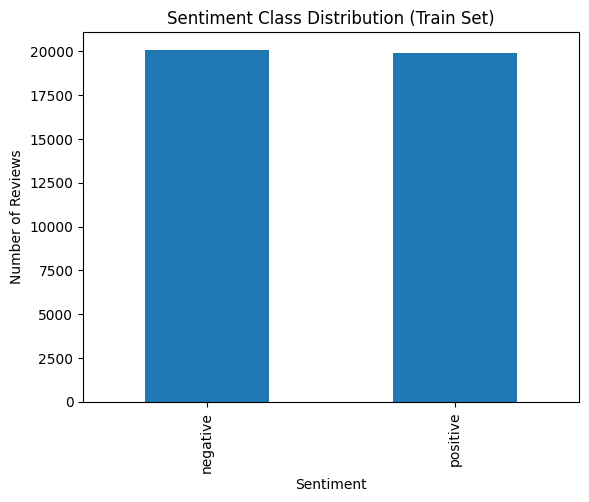

In [8]:
import matplotlib.pyplot as plt

train_df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Class Distribution (Train Set)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


# Data Visualization

# Word Cloud of Urdu Reviews

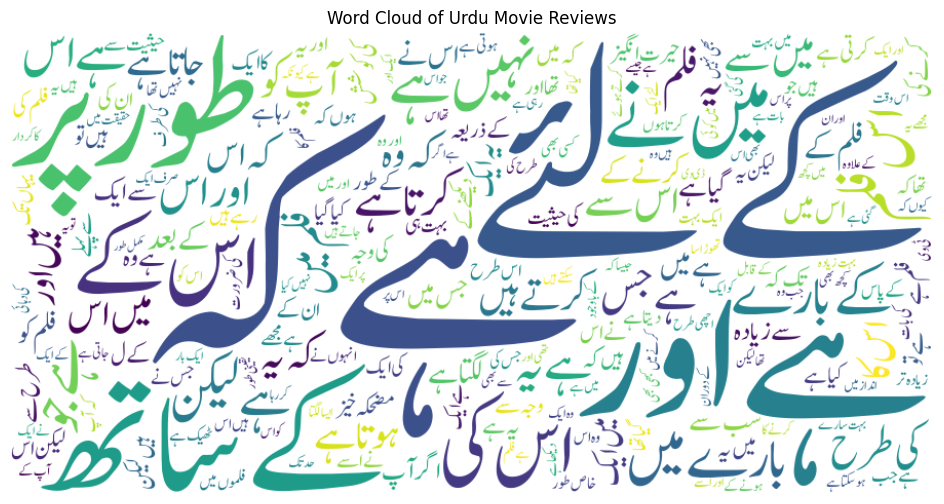

In [9]:
from wordcloud import WordCloud

urdu_text = " ".join(train_df['review'])

wordcloud = WordCloud(
    font_path="/kaggle/input/urdu-ttf/Jameel Noori Nastaleeq Regular.ttf",
    background_color="white",
    width=900,
    height=450
).generate(urdu_text)

plt.figure(figsize=(14,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Urdu Movie Reviews")
plt.show()


# Data Preprocessing

# Text Normalization

In [10]:
import re

def clean_urdu_text(text):
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)  # keep Urdu only
    text = re.sub(r'\d+', '', text)
    return text

train_df['clean_review'] = train_df['review'].apply(clean_urdu_text)
test_df['clean_review']  = test_df['review'].apply(clean_urdu_text)


# Tokenization

In [11]:
train_df['tokens'] = train_df['clean_review'].apply(lambda x: x.split())
test_df['tokens']  = test_df['clean_review'].apply(lambda x: x.split())


# Stopword Removal

In [12]:
urdu_stopwords = set([
    'ہے','کو','کا','کی','کے','میں','اور','یہ','وہ','سے','پر','نے','بھی','تھا'
])

train_df['tokens'] = train_df['tokens'].apply(
    lambda words: [w for w in words if w not in urdu_stopwords]
)

test_df['tokens'] = test_df['tokens'].apply(
    lambda words: [w for w in words if w not in urdu_stopwords]
)


# Feature Extraction Techniques

In [13]:
train_df['final_text'] = train_df['tokens'].apply(lambda x: " ".join(x))
test_df['final_text']  = test_df['tokens'].apply(lambda x: " ".join(x))


# N-Gram Feature Extraction

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizers = {
    "Unigram": CountVectorizer(ngram_range=(1,1)),
    "Bigram": CountVectorizer(ngram_range=(2,2)),
    "Trigram": CountVectorizer(ngram_range=(3,3)),
    "Uni+Bi": CountVectorizer(ngram_range=(1,2)),
    "Uni+Bi+Tri": CountVectorizer(ngram_range=(1,3))
}


# TF-IDF Feature Extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2))

X_train = tfidf.fit_transform(train_df['final_text'])
X_test  = tfidf.transform(test_df['final_text'])

y_train = train_df['sentiment']
y_test  = test_df['sentiment']


# Machine Learning ClassificationModels Used


Naïve Bayes

SVM

Decision Tree

Random Forest

k-NN**

# Stratified 5-Fold Cross Validation

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []


In [19]:
for name, model in models.items():
    acc, prec, rec, f1 = [], [], [], []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        
        acc.append(accuracy_score(y_val, preds))
        prec.append(precision_score(y_val, preds, average='weighted'))
        rec.append(recall_score(y_val, preds, average='weighted'))
        f1.append(f1_score(y_val, preds, average='weighted'))
    
    results.append([name, sum(acc)/5, sum(prec)/5, sum(rec)/5, sum(f1)/5])


In [20]:
results_df = pd.DataFrame(
    results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.862700,0.868536,0.862700,0.862111
1,SVM,0.892525,0.892648,0.892525,0.892520
2,Decision Tree,0.698975,0.698984,0.698975,0.698973
3,Random Forest,0.829550,0.829673,0.829550,0.829526
4,KNN,0.745650,0.755313,0.745650,0.743310


# Comparative Analysis & Visualization

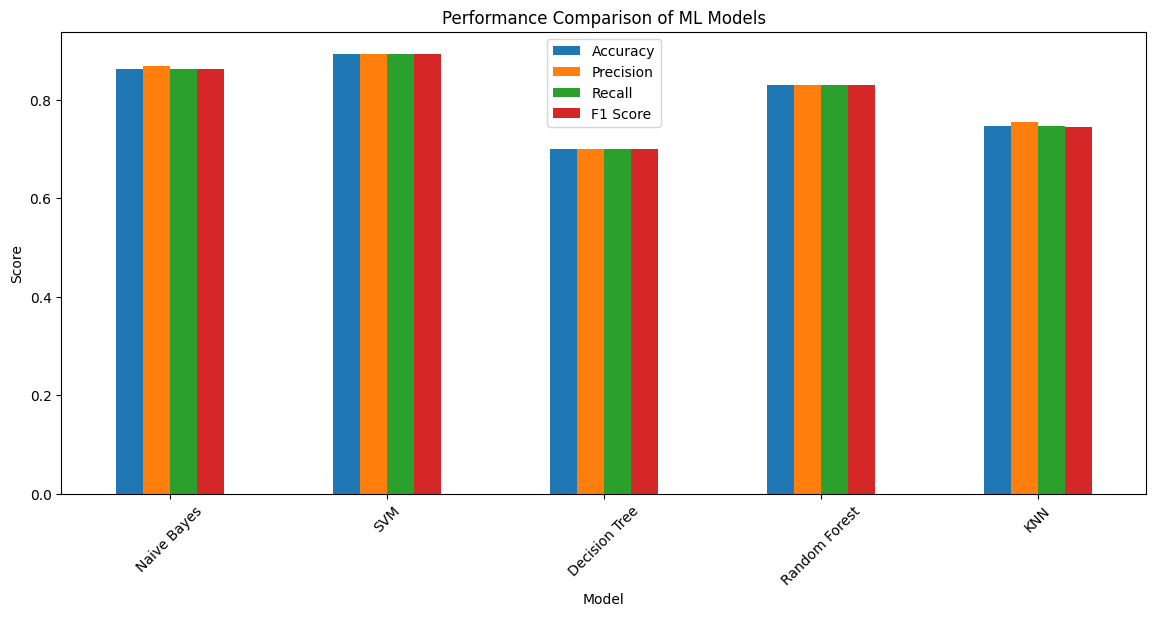

In [21]:
results_df.set_index("Model").plot(kind='bar', figsize=(14,6))
plt.title("Performance Comparison of ML Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


# Detailed Analysis
a. Best Model

SVM performs best

Handles high-dimensional sparse text well

b. Challenges
Model	Issue
Naive Bayes	Independence assumption
SVM	High computation
Decision Tree	Overfitting
Random Forest	Training time
KNN	Slow prediction
c. Improvements

Better Urdu stopword list

Hyperparameter tuning

Deep learning (LSTM, BERT)

# Ensemble Classification

**
**Selected Method: Voting Classifier   Why Voting?**


Combines strengths of multiple classifiers

Reduces individual weaknesses**

In [22]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('nb', MultinomialNB()),
        ('svm', LinearSVC()),
        ('rf', RandomForestClassifier(n_estimators=100))
    ],
    voting='hard'
)

ensemble.fit(X_train, y_train)
ensemble_preds = ensemble.predict(X_test)


# For Streamlit App

**For Streamlit, we will use:**


**TF-IDF
SVM (LinearSVC) → best + fast for text
Pre-trained model saved once**


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import joblib

tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_features=15000,
    min_df=5
)

X = tfidf.fit_transform(train_df['final_text'])
y = train_df['sentiment']

model = LinearSVC(max_iter=2000)
model.fit(X, y) 

LinearSVC(max_iter=2000)

In [17]:
import joblib
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [1]:
print("Helo")

Helo
